<a href="https://colab.research.google.com/github/mahin-arvind/Appliance-Energy-Prediction/blob/main/Appliance_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Introduction
Data-driven prediction of energy use of appliances
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).


#2 **Data Description**

**date:** time year-month-day hour:minute:second

**Appliances:** energy use in Wh (Dependent variable)

**lights:** energy use of light fixtures in the house in Wh (Drop this column)

**T1**, Temperature in kitchen area, in Celsius

**RH1**: Humidity in kitchen area, in % T2, 

**Temperature**: in living room area, in Celsius 

**RH2**:
Humidity in living room area, in %

**T3:** Temperature in laundry room area

**RH3:** Humidity in laundry room area, in % 

**T4:** Temperature in office room, in Celsius 

**RH4:**Humidity in office room, in %

**T5:** Temperature in bathroom, in Celsius

**RH5:** Humidity in bathroom, in % T6, Temperature outside the building (north side), in Celsius

**RH6:** Humidity outside the building (north side), in %

**T7:** Temperature in ironing room , in Celsius

**RH7:** Humidity in ironing room, in % T8, Temperature in teenager room 2, in Celsius 

**RH8**: Humidity in teenager room 2, in %

**T9:** Temperature in parents room, in Celsius

**RH9:** Humidity in parents room, in % To, Temperature outside (from Chievres weather station), inCelsius Pressure (from Chievres weather station), in mm Hg RHout, Humidity outside (from
Chievres weather station), in %

**Wind speed:** (from Chievres weather station), in m/s

**Visibility:** (from Chievres weather station), in km

**Tdewpoint:** (from Chievres weather station), Â°C

**rv1:** Random variable 1, nondimensional

**rv2:** Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station
(Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis,
rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of
weather data.

# 3 Importing Libraries and Dataset 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Datasets/Regression/Appliances Energy Prediction/data_application_energy.csv'
df = pd.read_csv(path)

###Inspection

In [4]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Dropping Lights column as instructed


In [5]:
df.drop('lights', axis =1, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

It is observed that all the features other than date is a numerical attribute and no null values are present in the given data

Object type attribute date is converted to datetype and its characteristics such as day of the month, day of the week, month, year, hour of day and minutes are extracted individually to make better sense 

In [7]:
df.date = pd.to_datetime(df.date) #extract features from this later

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   T1           19735 non-null  float64       
 3   RH_1         19735 non-null  float64       
 4   T2           19735 non-null  float64       
 5   RH_2         19735 non-null  float64       
 6   T3           19735 non-null  float64       
 7   RH_3         19735 non-null  float64       
 8   T4           19735 non-null  float64       
 9   RH_4         19735 non-null  float64       
 10  T5           19735 non-null  float64       
 11  RH_5         19735 non-null  float64       
 12  T6           19735 non-null  float64       
 13  RH_6         19735 non-null  float64       
 14  T7           19735 non-null  float64       
 15  RH_7         19735 non-null  float64       
 16  T8  

In [9]:
df.describe()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


since mean,maximum and minimum value of columns 'year' and 'seconds' is same with 0 standard deviation, we can drop these as well as they are zero-variance attributes 

In [10]:
df.shape

(19735, 28)

In [11]:
df.columns

Index(['date', 'Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

Looking for duplicate rows

In [12]:
df.duplicated().any()

False

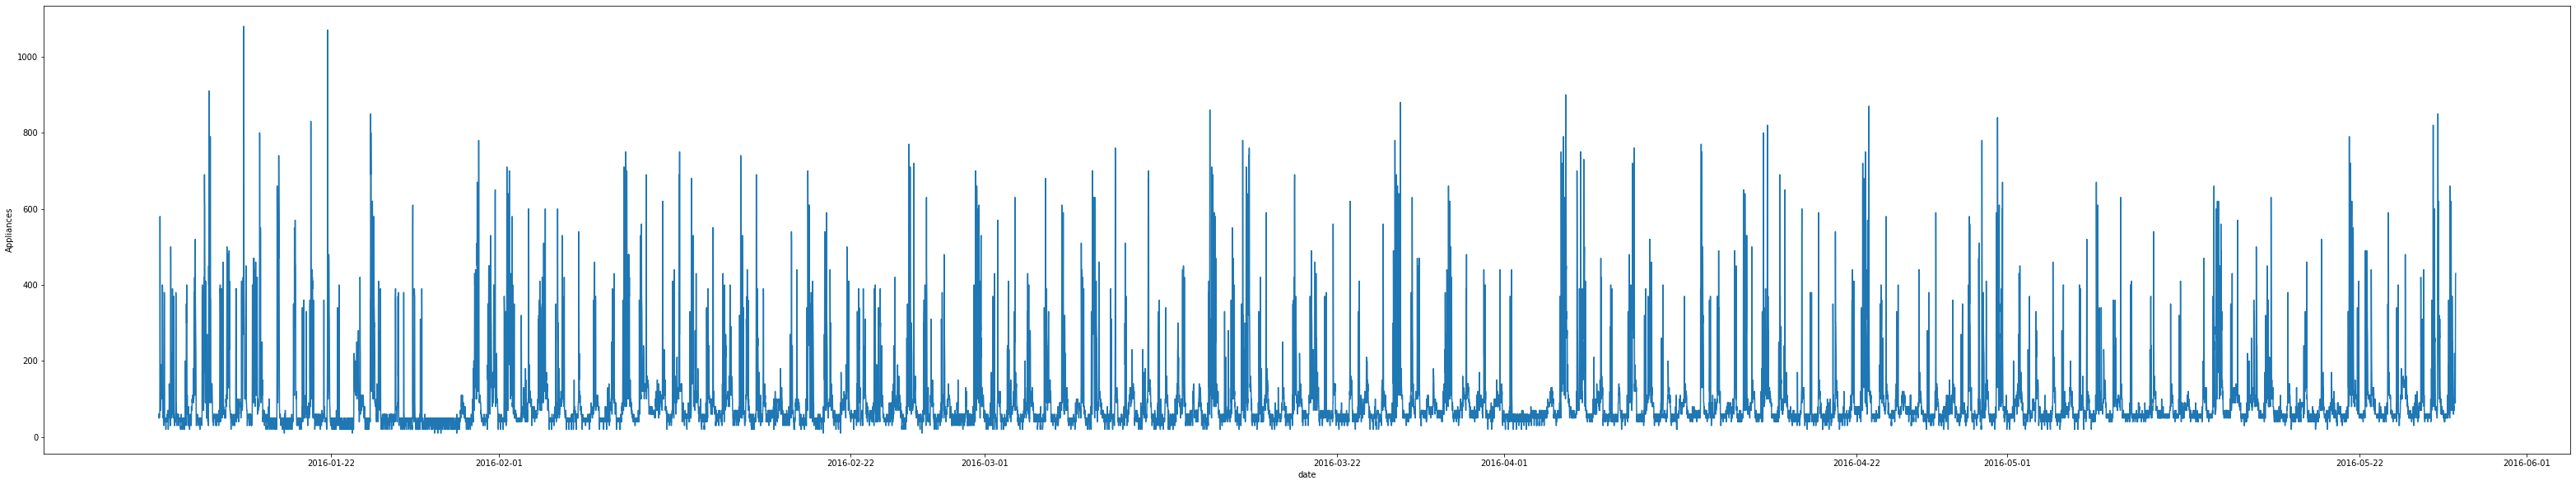

In [13]:
plt.figure(figsize =(55,10))
sns.lineplot(x='date', y = 'Appliances', data = df)

One can approach the following problem using Traditional Supervised ML models and Time Series models as well since the data provides a time component.

Traditional Supervised ML models will be trained as of now

'date' column is extracted to get features like 'year', 'time_of_day', 'day_of_month' and 'day_of_week'

In [14]:
df['date'] = pd.to_datetime(df['date'])
df['time_of_day'] = df['date'].dt.hour + (df['date'].dt.minute)/60 + (df['date'].dt.second)/3600 # this attribute will be further converted into cyclic form 
df['month'] = df['date'].dt.month #categorical
df['day_of_month'] = df['date'].dt.day #
df['day_of_week'] = df['date'].dt.dayofweek

In [15]:
df.drop('date', axis =1, inplace = True)

In [16]:
df.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'time_of_day', 'month', 'day_of_month',
       'day_of_week'],
      dtype='object')

In [17]:
numerical_features = [ 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'time_of_day', 'day_of_month' ]
dependent_feature = ['Appliances']
categorical_feature = ['month','day_of_week']

In [18]:
df.describe()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,time_of_day,month,day_of_month,day_of_week
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,...,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,11.918647,3.101647,16.057411,2.977249
std,102.524891,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,...,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,6.927784,1.339200,8.450998,1.985617
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,...,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,0.000000,1.000000,1.000000,0.000000
25%,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,...,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,6.000000,2.000000,9.000000,1.000000
50%,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,...,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,12.000000,3.000000,16.000000,3.000000
75%,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,...,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,17.833333,4.000000,23.000000,5.000000
max,1080.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,...,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,23.833333,5.000000,31.000000,6.000000


#EDA



##Univariate Analysis

###Numerical Features

 #### Distribution 

In [19]:
len(numerical_features)

28

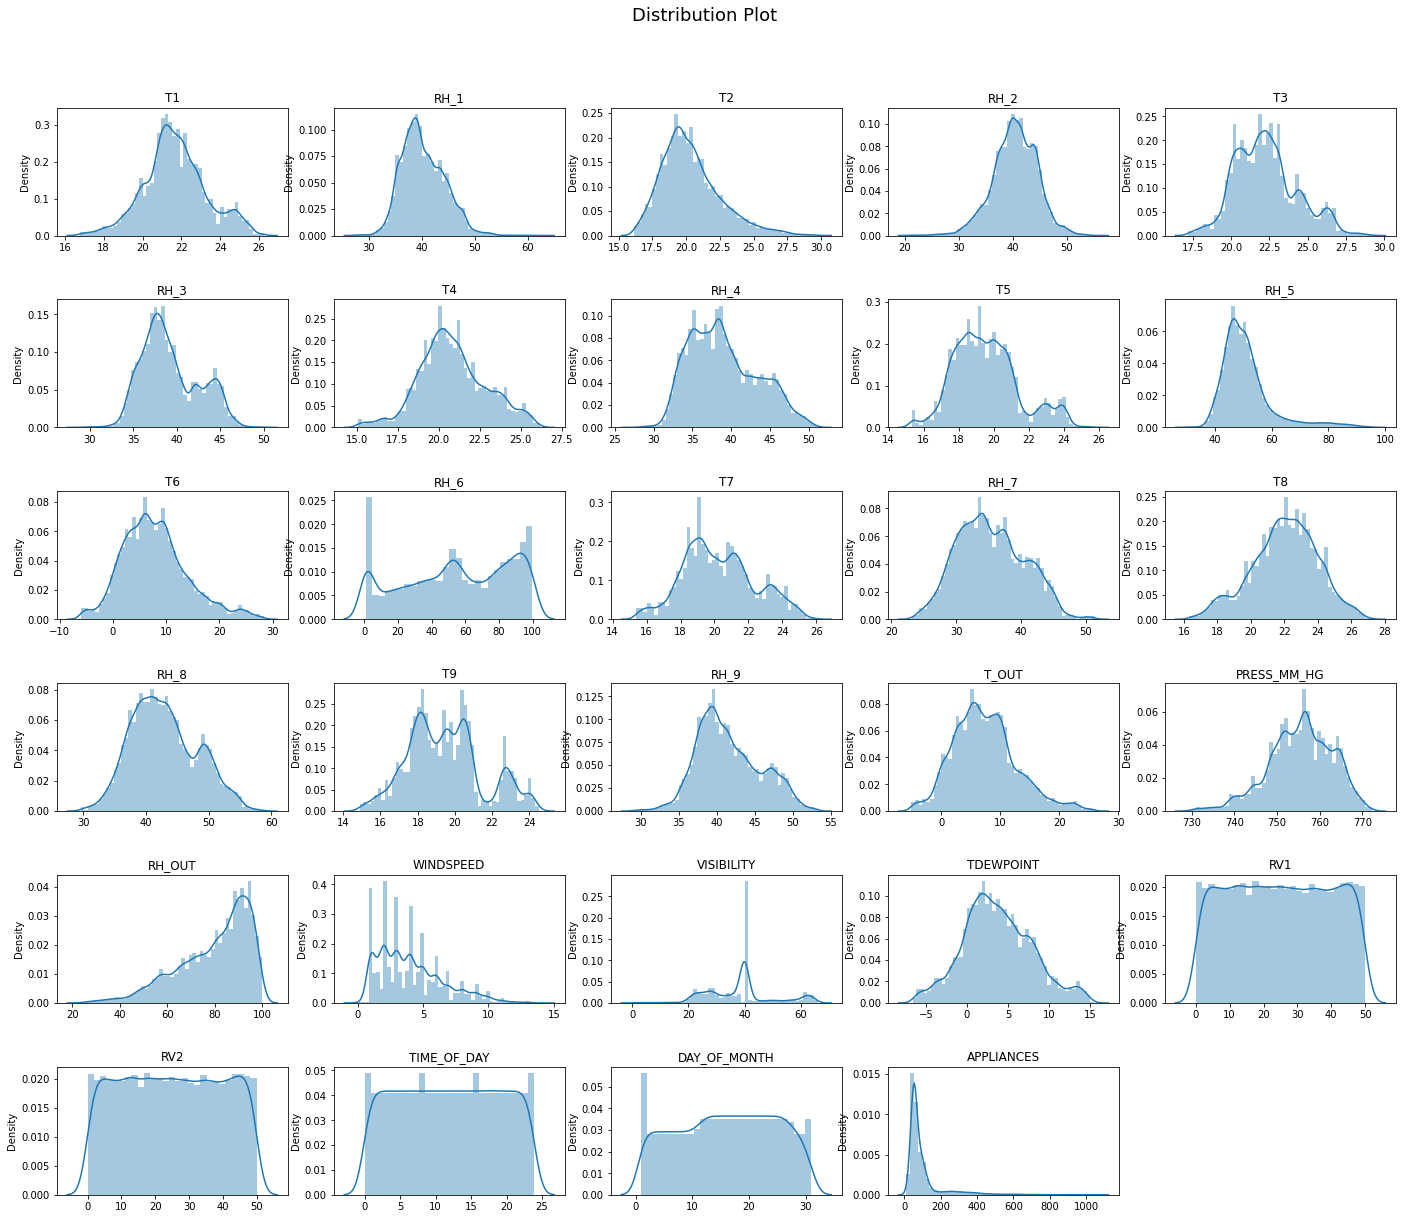

In [51]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(24, 20))
plt.suptitle("Distribution Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(numerical_features + ['Appliances']):
    # add a new subplot iteratively
    ax = plt.subplot(6, 5, n + 1)
    plt.subplots_adjust(hspace=0.5, wspace=0.2)
    # filter df and plot ticker on the new subplot axis
    sns.distplot(df[ticker])
    ax.set_title(ticker.upper())
    ax.set_xlabel("")

#### Q-Q plot

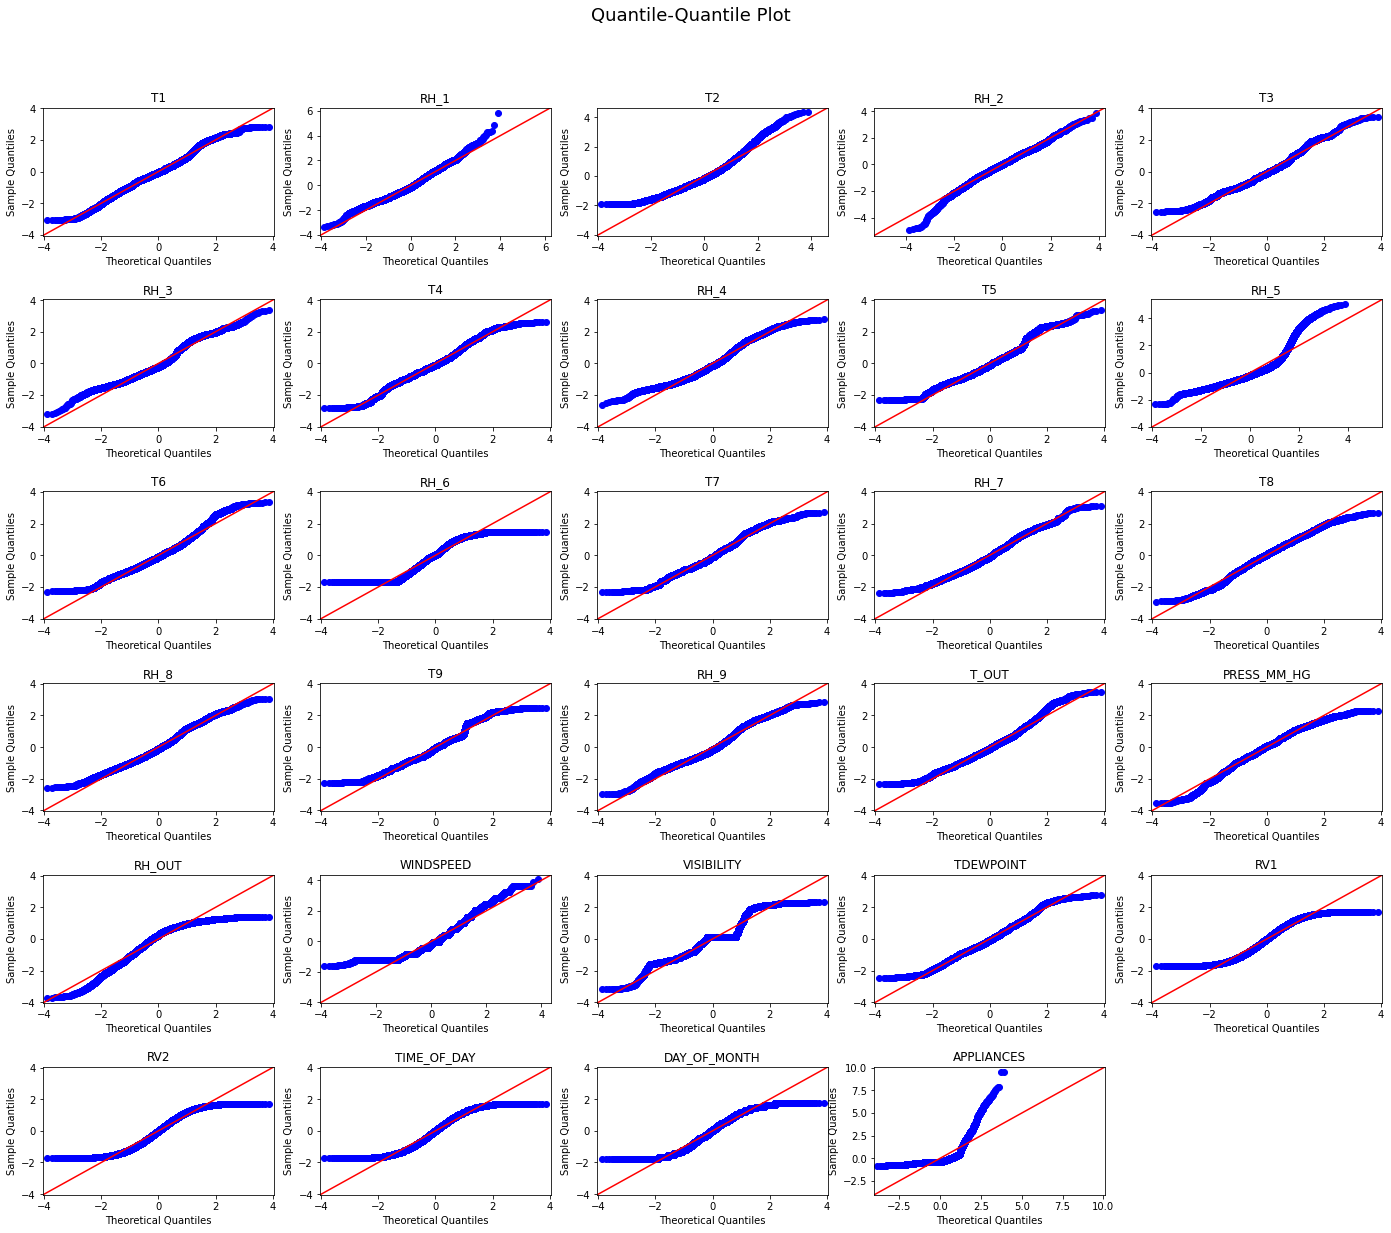

In [52]:
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats

plt.figure(figsize=(24, 20))
plt.suptitle("Quantile-Quantile Plot", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, ticker in enumerate(numerical_features+ ['Appliances']):
    # add a new subplot iteratively
    ax = plt.subplot(6, 5, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)
    # filter df and plot ticker on the new subplot axis
    sm.qqplot(df[ticker],line='45', fit=True ,dist= 'norm',ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

####Box Plot

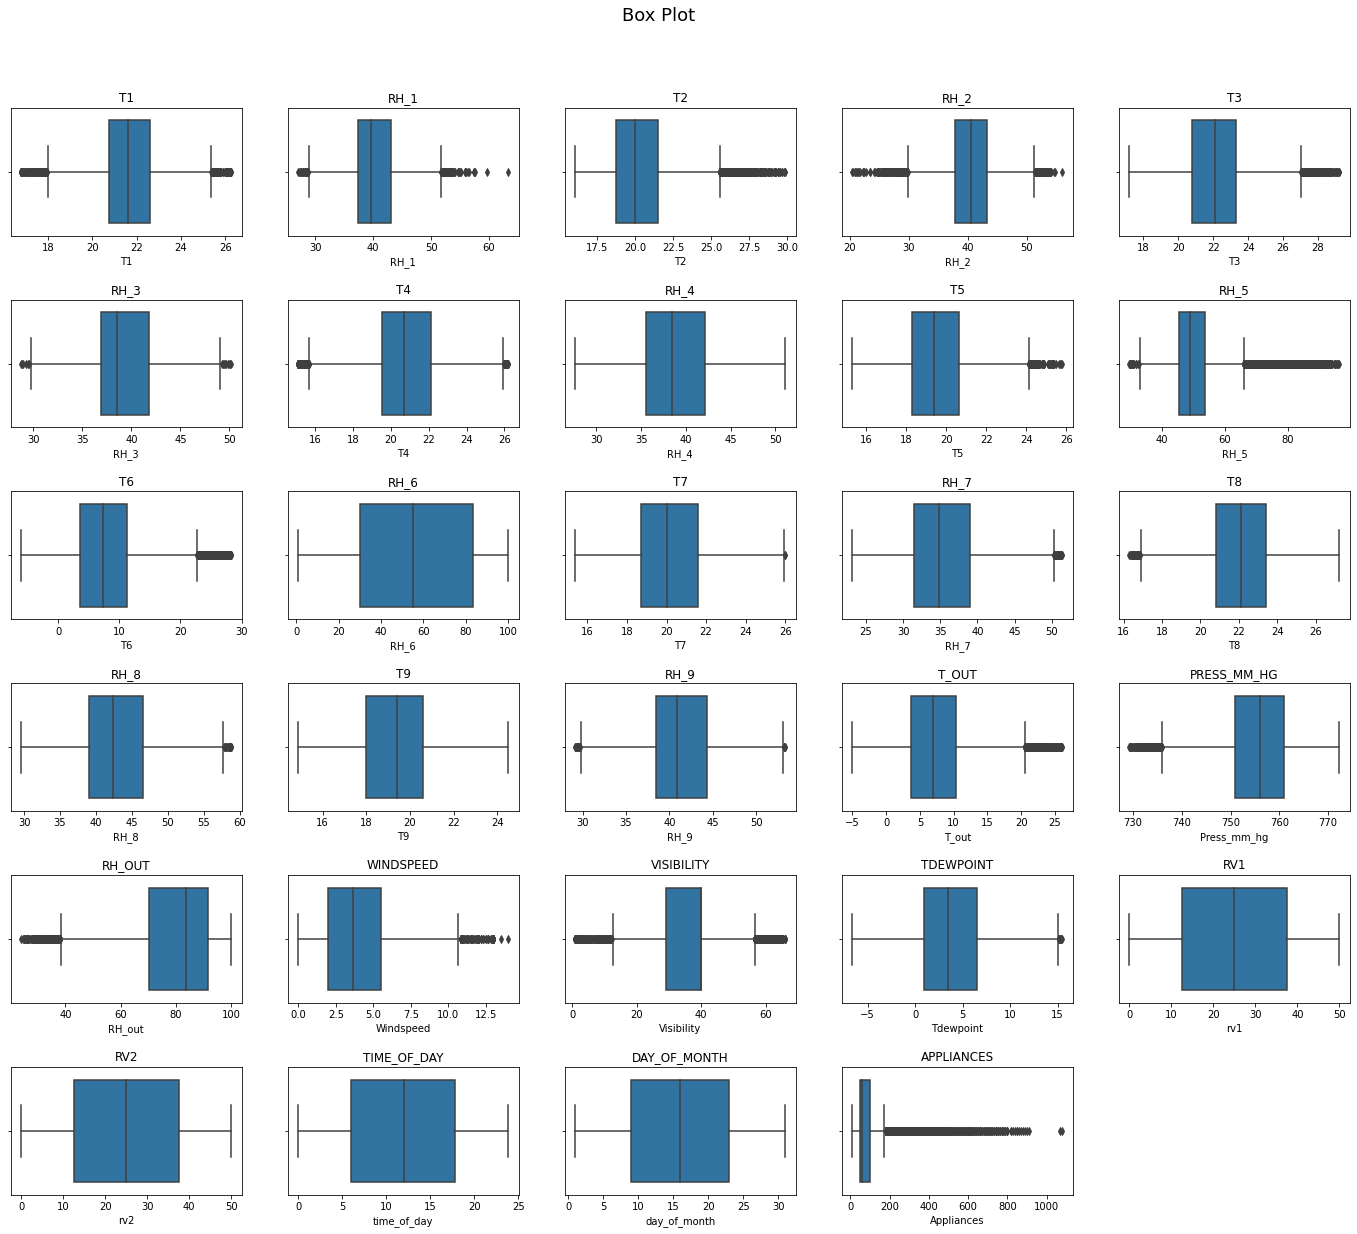

In [58]:

plt.figure(figsize=(24, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, ticker in enumerate(numerical_features+ ['Appliances']):
    # add a new subplot iteratively
    ax = plt.subplot(6, 5, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)
    # filter df and plot ticker on the new subplot axis
    sns.boxplot(df[ticker],ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

###Categorical Features

Although these features aren't of type 'Object', they are categorical in nature

In [59]:
categorical_feature

['month', 'day_of_week']

####Count Plot

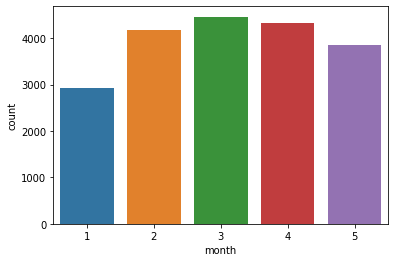

In [60]:
sns.countplot('month', data = df)

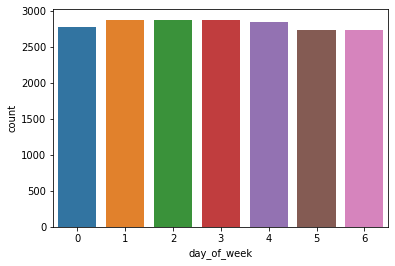

In [61]:
sns.countplot('day_of_week', data = df)

##Bivariate Analysis

###Continuous and Continuous

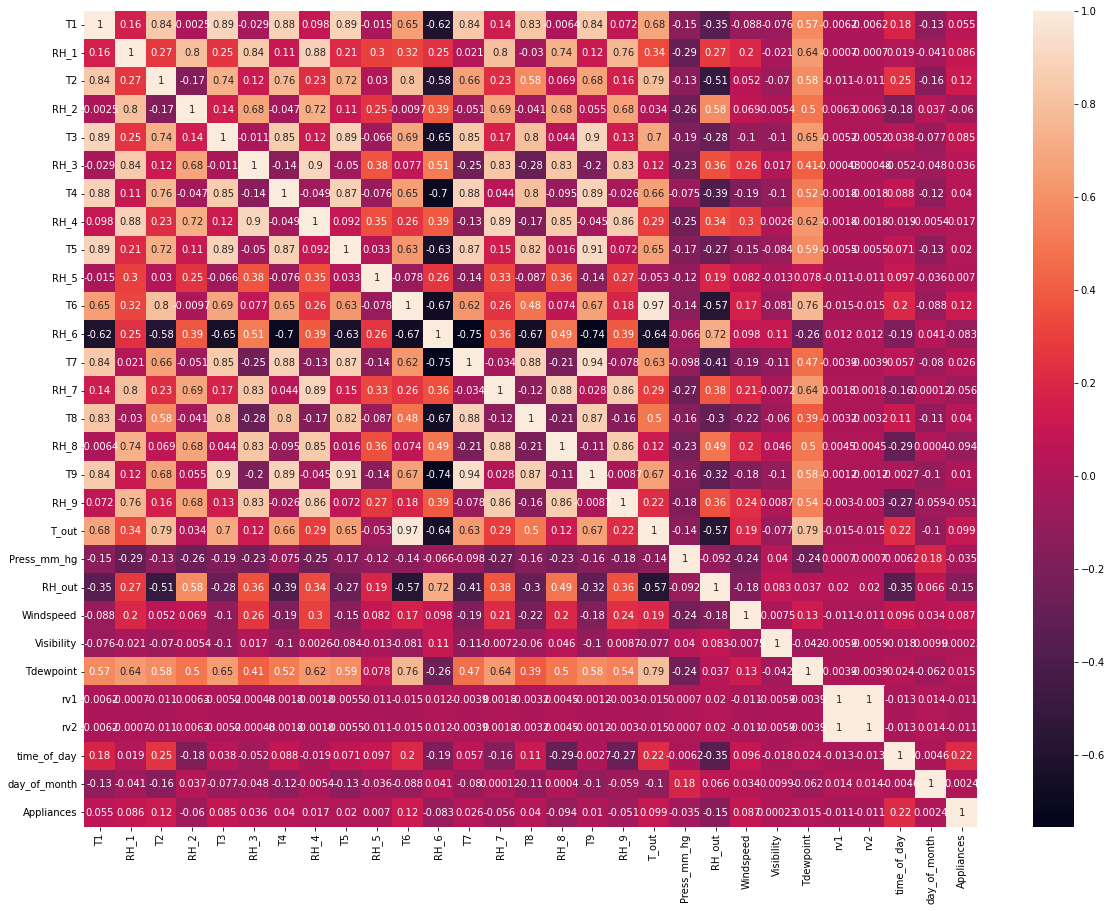

In [87]:
plt.figure(figsize = (20,15))
sns.heatmap(df.loc[:,numerical_features + ['Appliances']].corr(), annot = True)

'rv1' and 'rv2' have correlation of 1

In [91]:
(df['rv1'] ==df['rv2']).unique()

array([ True])

Since both the features are identical, one of them is eliminated from the dataset

In [92]:
df.drop('rv2', axis = 1, inplace = True)
numerical_features.remove('rv2')

In [129]:
numerical_features

['T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'time_of_day',
 'day_of_month']

In [132]:
len(measurements)

25

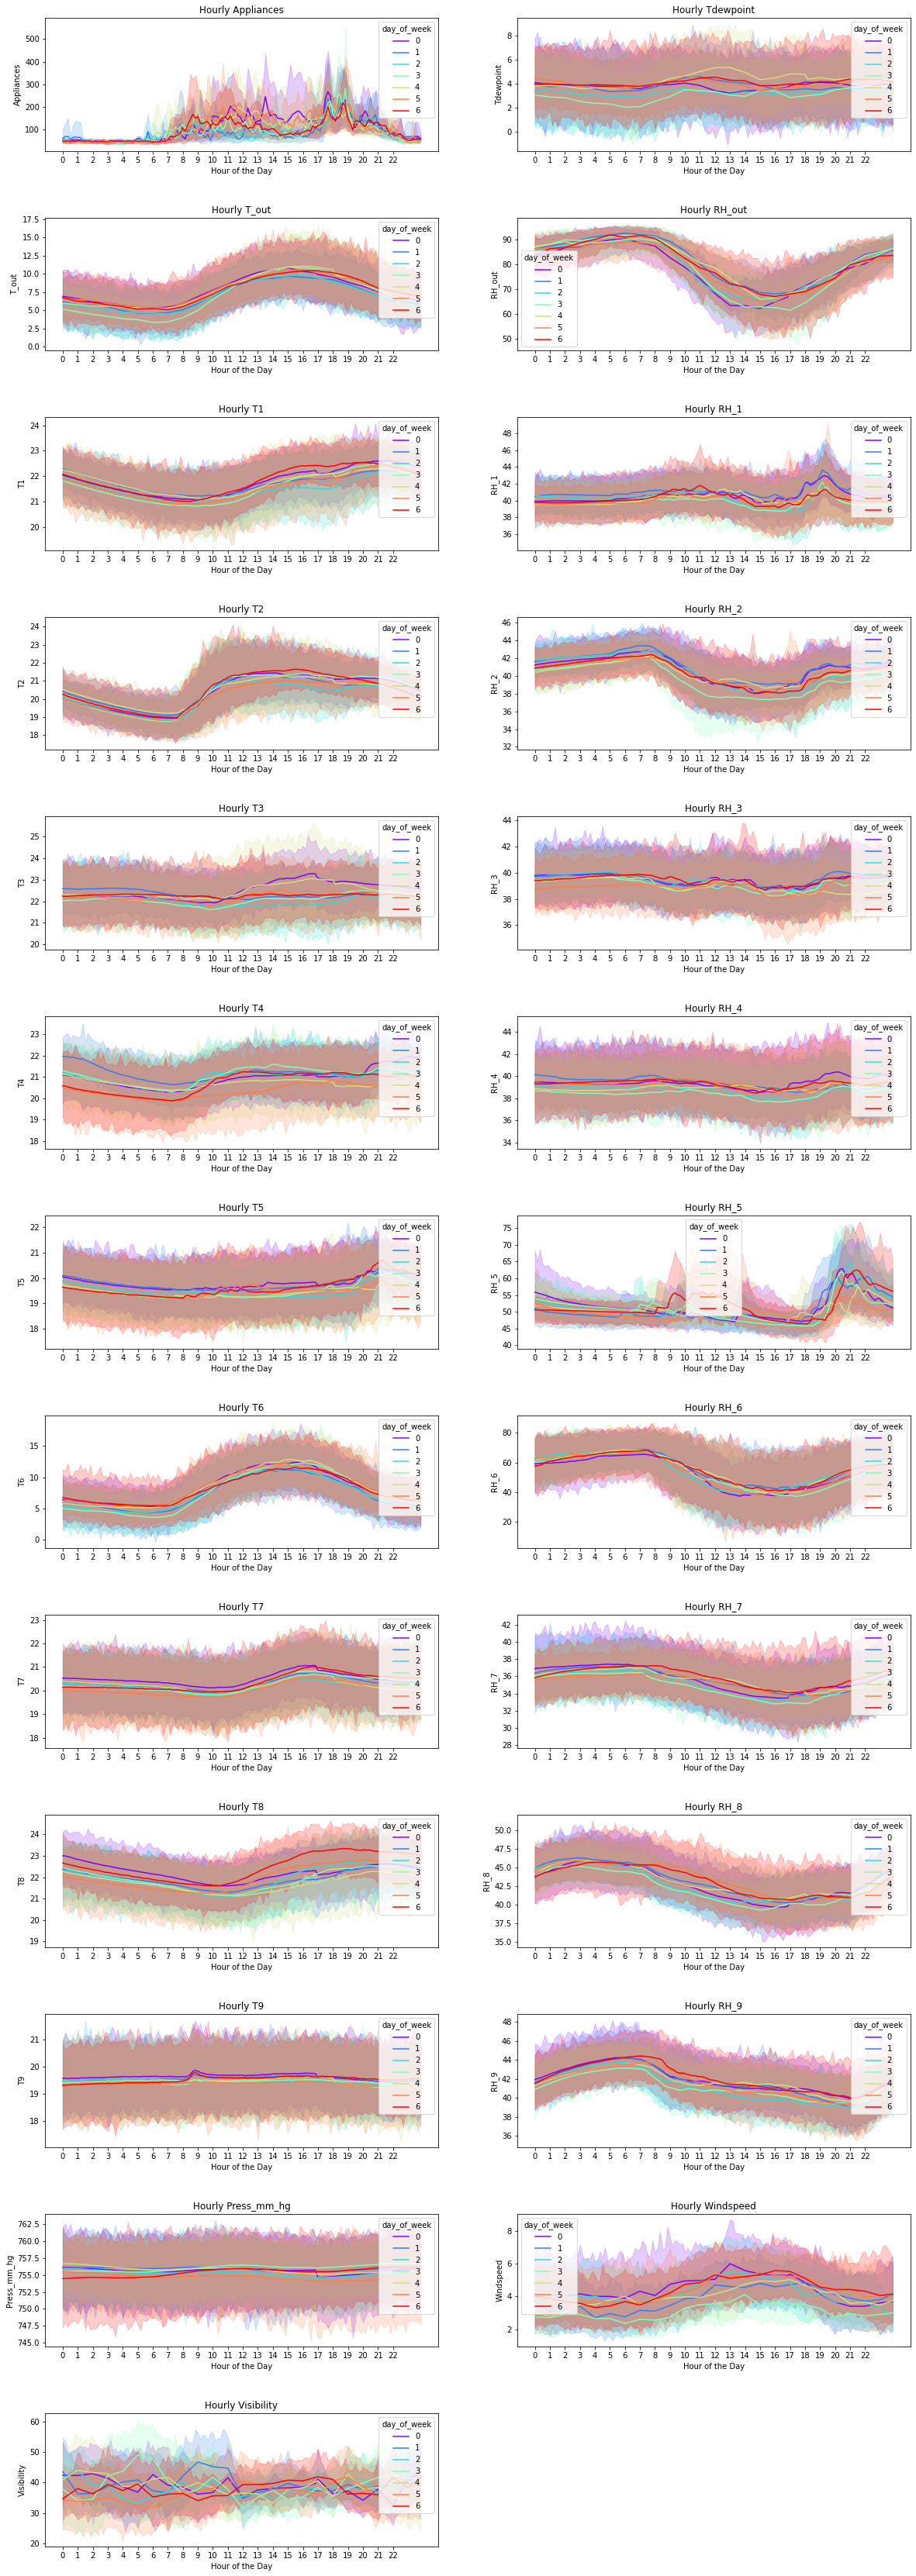

In [138]:
measurements = ['Appliances','Tdewpoint','T_out','RH_out','T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','Press_mm_hg','Windspeed','Visibility',]
plt.figure(figsize=(20, 60))
for n, measurement in enumerate(measurements):
    # add a new subplot iteratively
    ax = plt.subplot(13, 2, n + 1)
    plt.subplots_adjust(hspace=0.5, wspace=0.2)
    sns.lineplot(x= df['time_of_day'], y = df[measurement], hue = df['day_of_week'] ,palette = 'rainbow', ci =100, ax = ax)
    plt.xticks(np.arange(0,23,1))
    plt.title(f"Hourly {measurement}")
    plt.xlabel("Hour of the Day")
    plt.ylabel(measurement)
plt.show()
